In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

$$f(x) = Ae^{\frac{-(x-B)^2}{C}}$$

In [15]:
def gaussian(x, a, b, c):
    '''Gaussian function of the form above
    a:   height of curve's peak 
    b:   position of the center of the peak
    c:   standard deviation; width of bell
    x:   input vector
    '''
    
    return a*np.exp((-(x - b)**2) / c)

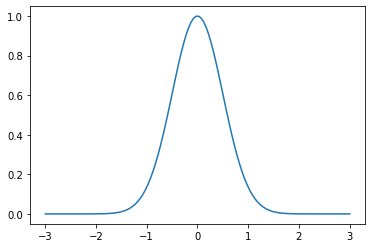

In [16]:
x = np.linspace(-3, 3, 120)
plt.plot(x, gaussian(x, 1, 0, 0.5))
plt.show()

$$C(r, t) = \frac{\phi(t)}{\sqrt{(4\pi D(t-t_o))^3}}e^{\frac{-(r-r_o)^2}{4D(t-t_o)}}$$
$$A = \frac{\phi(t)}{\sqrt{(4\pi D(t-t_o))^3}}$$
$$B = r_o $$
$$C = 4D(t-t_o)$$

In [22]:
# Constants
D = 1
t = 1
B = 0
C = 4*D*t

/Users/margotwagner/opt/anaconda3/lib/python3.7/site-packages/scipy/integrate/odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


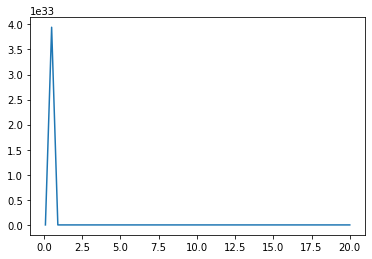

In [35]:
'''A includes phi(t), which needs to be solved for'''
from scipy.integrate import odeint 

def phi_fun(phi, t):
    D = 2.2e6 # cm2/s
    k_calb = (17.4e7 + 2.2e7) # 1/(Ms)
    k_pmca = 1.5e8 # 1/(Ms)
    return k_calb*phi - k_pmca*(phi/np.sqrt(4*np.pi*D*t))

# IC
phi0 = 1

# time points
t = np.linspace(0.1,20)

# solve ODE
phi = odeint(phi_fun, phi0, t)


# plot
plt.plot(t, phi)
plt.show()

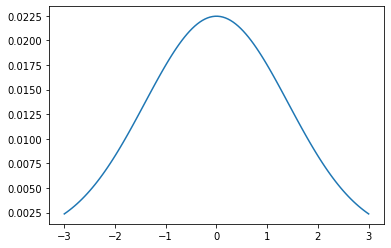

In [20]:
plt.plot(x, gaussian(x, a, b, c))
plt.show()

In [29]:
phi_0 = 1
t0 = 0

def dphi_dt(phi, t):
    
    return -k_calb*phi - k_pmca*(phi/np.sqrt(4*np.pi*(t-t0)))
    


In [31]:
phi_0 = 1
t0 = 0
r0 = 0
D = 1
k_calb = 1
k_pmca = 1

t = 1
r_arr = np.linspace(-3, 3, 120)
for r in r_arr:
    phi = phi_0 + (-k_calb*phi - k_pmca*(phi/np.sqrt(4*np.pi*(t-t0))))*(1)
    c = phi/np.sqrt((4*np.pi*D*(t - t0))**3)*np.exp(-(r - r0)**2/(4*D*(t - t0)))

In [34]:
c

array([[1.18583808e+10],
       [1.10346483e+10],
       [1.38770944e+10],
       [1.86673006e+10],
       [2.55349536e+10],
       [3.50080094e+10],
       [4.79196129e+10],
       [6.54603633e+10],
       [8.92924551e+10],
       [1.21722001e+11],
       [1.65944659e+11],
       [2.26391078e+11],
       [3.09211202e+11],
       [4.22952996e+11],
       [5.79514259e+11],
       [7.95478478e+11],
       [1.09399152e+12],
       [1.50740063e+12],
       [2.08096891e+12],
       [2.87810829e+12],
       [3.98775832e+12],
       [5.53479965e+12],
       [7.69476219e+12],
       [1.07146158e+13],
       [1.49421818e+13],
       [2.08677692e+13],
       [2.91831620e+13],
       [4.08652426e+13],
       [5.72946224e+13],
       [8.04240428e+13],
       [1.13017578e+14],
       [1.58990611e+14],
       [2.23893329e+14],
       [3.15598712e+14],
       [4.45282040e+14],
       [6.28816225e+14],
       [8.88760491e+14],
       [1.25719620e+15],
       [1.77977269e+15],
       [2.52148215e+15],


# Calbindin ODE

## Steady-state

In [2]:
from scipy.optimize import fsolve
def calb_ss(calb):
    '''
     ODEs to describe calbindin kinetics according to Bartol et al (2015)
     input:        calb:        array of calbindin concentrations (arr, 9 x 1)
     output:       eqtns:          the blender user-set value of the parameter (float or None)
     '''
    
    # k_values meaning
    TWO_BIND_SITES = 2 # factor for two open binding sites
    K_MED_FOR = 8.7e7    # medium affinity forward binding
    K_MED_REV = 35.8     # medium affinity reverse binding
    K_HIGH_FOR = 1.1e7    # high affinity forward binding
    K_HIGH_REV = 2.6      # high affinity reverse binding

    # k_m0m1, k_m1m2, k_m1m0, k_m2m1, k_h0h1, k_h1h2, k_h1h2, k_h1h0, k_h2h1
    CALB_K_VALS = [TWO_BIND_SITES*K_MED_FOR, 
                   K_MED_FOR, 
                   K_MED_REV, 
                   TWO_BIND_SITES*K_MED_REV,
                   TWO_BIND_SITES*K_HIGH_FOR,
                   K_HIGH_FOR, 
                   K_HIGH_REV, 
                   TWO_BIND_SITES*K_HIGH_REV]
    
    # Unpack input
    h0m0, h0m1, h0m2, h1m0, h1m1, h1m2, h2m0, h2m1, h2m2 = calb
    k_m0m1, k_m1m2, k_m1m0, k_m2m1, k_h0h1, k_h1h2, k_h1h0, k_h2h1 = CALB_K_VALS
    
    # calcium
    ca = 1e-7 # M
    
    eqtns = []
    
    eqtns.append(-(k_h0h1*ca + k_m0m1*ca)*h0m0 + k_m1m0*h0m1 + k_h1h0*h1m0)
    
    eqtns.append(-(k_m1m0 + k_h0h1*ca + k_m1m2*ca)*h0m1 + k_m0m1*ca*h0m0 + k_m2m1*h0m2 + k_h1h0*h1m1)
    
    eqtns.append(-(k_h0h1*ca + k_m2m1)*h0m2 + k_h1h0*h1m2 + k_m1m2*ca*h0m1)
    
    eqtns.append(-(k_h1h0 + k_m0m1*ca + k_h1h2*ca)*h1m0 + k_m1m0*h1m1 + k_h2h1*h2m0 + k_h0h1*ca* h0m0) 
    
    eqtns.append(-(k_m1m0 + k_h1h0 + k_m1m2*ca + k_h1h2*ca)*h1m1 + k_h2h1*h2m1 + k_m2m1*h1m2 
                 + k_m0m1*ca* h1m0 + k_h0h1*ca*h0m1) 
    
    eqtns.append(-(k_m2m1 + k_h1h0 + k_h1h2*ca)*h1m2 + k_h2h1*h2m2 + k_m1m2*ca*h1m1 + k_h0h1*ca*h0m2)
    
    eqtns.append(-(k_h2h1 + k_m0m1*ca)*h2m0 + k_m1m0*h2m1 + k_h1h2*ca*h1m0)
    
    eqtns.append(-(k_h2h1 + k_m1m0 + k_m1m2*ca)*h2m1 + k_m2m1*h2m2 + k_m0m1*ca*h2m0 + k_h1h2*ca*h1m1)
    
    eqtns.append(-(k_h2h1 + k_m2m1)*h2m2 + k_m1m2*ca*h2m1 + k_h1h2*ca*h1m2)
    
    return eqtns

In [3]:
'''Solve for steady-state solutions of ODE'''   
N_STATES = 9
TWO_BIND_SITES = 2 # factor for two open binding sites
K_MED_FOR = 8.7e7    # medium affinity forward binding
K_MED_REV = 35.8     # medium affinity reverse binding
K_HIGH_FOR = 1.1e7    # high affinity forward binding
K_HIGH_REV = 2.6      # high affinity reverse binding

# k_m0m1, k_m1m2, k_m1m0, k_m2m1, k_h0h1, k_h1h2, k_h1h2, k_h1h0, k_h2h1
CALB_K_VALS = [TWO_BIND_SITES*K_MED_FOR, K_MED_FOR, K_MED_REV, 
               TWO_BIND_SITES*K_MED_REV, TWO_BIND_SITES*K_HIGH_FOR,
               K_HIGH_FOR, K_HIGH_REV, TWO_BIND_SITES*K_HIGH_REV]


conc_calb_x0 = np.ones(N_STATES)    # starting estimate for roots 

# Solve for roots of system of nonlinear equations
conc_calb = fsolve(calb_ss, conc_calb_x0)

# Fraction of calibnindin in each state at ss
# h0m0, h0m1, h0m2, h1m0, h1m1, h1m2, h2m0, h2m1, h2m2
calb_frac = np.empty(N_STATES)
for i in range(N_STATES):
    calb_frac[i] = conc_calb[i]/sum(conc_calb)
    
print(calb_frac)

[0.31958713 0.15533006 0.0188739  0.27041988 0.13143312 0.01597023
 0.0572042  0.02780316 0.00337832]


## Solve ODE

In [4]:
'''Equations'''
def calb_odes(t, y):
    '''
     ODEs to describe calbindin kinetics according to Bartol et al (2015)
     input:        calb:        array of calbindin concentrations (arr, 9 x 1)
     output:       eqtns:       system of odes to describe calbindin
     '''
    
    # k_values meaning
    TWO_BIND_SITES = 2 # factor for two open binding sites
    K_MED_FOR = 8.7e7    # medium affinity forward binding (1/Mca*sec)
    K_MED_REV = 35.8     # medium affinity reverse binding
    K_HIGH_FOR = 1.1e7    # high affinity forward binding
    K_HIGH_REV = 2.6      # high affinity reverse binding

    # k_m0m1, k_m1m2, k_m1m0, k_m2m1, k_h0h1, k_h1h2, k_h1h0, k_h2h1
    CALB_K_VALS = [TWO_BIND_SITES*K_MED_FOR, 
                   K_MED_FOR, 
                   K_MED_REV, 
                   TWO_BIND_SITES*K_MED_REV,
                   TWO_BIND_SITES*K_HIGH_FOR,
                   K_HIGH_FOR, 
                   K_HIGH_REV, 
                   TWO_BIND_SITES*K_HIGH_REV]
    
    # Unpack input
    h0m0, h0m1, h0m2, h1m0, h1m1, h1m2, h2m0, h2m1, h2m2, ca = y
    k_m0m1, k_m1m2, k_m1m0, k_m2m1, k_h0h1, k_h1h2, k_h1h0, k_h2h1 = CALB_K_VALS
    
    # calcium conc as baseline plus ap values
    #ca = conc_ca
    
    eqtns = []
    
    # d(h0m0)/dt 
    eqtns.append(-(k_h0h1*ca + k_m0m1*ca)*h0m0 + k_m1m0*h0m1 + k_h1h0*h1m0)
    
    # d(h0m1)/dt 
    eqtns.append(-(k_m1m0 + k_h0h1*ca + k_m1m2*ca)*h0m1 + k_m0m1*ca*h0m0 + k_m2m1*h0m2 + k_h1h0*h1m1)
    
    # d(h0m2)/dt
    eqtns.append(-(k_h0h1*ca + k_m2m1)*h0m2 + k_h1h0*h1m2 + k_m1m2*ca*h0m1)
    
    # d(h1m0)/dt 
    eqtns.append(-(k_h1h0 + k_m0m1*ca + k_h1h2*ca)*h1m0 + k_m1m0*h1m1 + k_h2h1*h2m0 + k_h0h1*ca*h0m0) 
    
    # d(h1m1)/dt
    eqtns.append(-(k_m1m0 + k_h1h0 + k_m1m2*ca + k_h1h2*ca)*h1m1 + k_h2h1*h2m1 + k_m2m1*h1m2 
                 + k_m0m1*ca* h1m0 + k_h0h1*ca*h0m1) 
    
    # d(h1m2)/dt
    eqtns.append(-(k_m2m1 + k_h1h0 + k_h1h2*ca)*h1m2 + k_h2h1*h2m2 + k_m1m2*ca*h1m1 + k_h0h1*ca*h0m2)
    
    # d(h2m0)/dt 
    eqtns.append(-(k_h2h1 + k_m0m1*ca)*h2m0 + k_m1m0*h2m1 + k_h1h2*ca*h1m0)
    
    # d(h2m1)/dt
    eqtns.append(-(k_h2h1 + k_m1m0 + k_m1m2*ca)*h2m1 + k_m2m1*h2m2 + k_m0m1*ca*h2m0 + k_h1h2*ca*h1m1)
    
    # d(h2m2)/dt
    eqtns.append(-(k_h2h1 + k_m2m1)*h2m2 + k_m1m2*ca*h2m1 + k_h1h2*ca*h1m2)
    
    # d(ca)/dt
    eqtns.append(- ( k_h0h1*(h0m0 + h0m1 + h0m2) + k_h1h2*(h1m0 + h1m1 + h1m2) + k_m0m1*(h0m0 + h1m0 + h2m0)
                   + k_m1m2*(h0m1 + h1m1 + h2m1) )*ca  +  k_h1h0*(h1m0 + h1m1 + h1m2) + k_h2h1*(h2m0 + h2m1 + h2m2)
                   + k_m1m0*(h0m1 + h1m1 + h2m1) + k_m2m1*(h0m2 + h1m2 + h2m2))
    
    return eqtns

In [5]:
'''Solving'''

from scipy.integrate import solve_ivp
import math
'''solve_ivp(fun, t_span, y0)
    - fun:     RHS of the system, fun(t, y)
    - t_span:  integral of integration (t0, tf)
    - y0:      initial state
    
    returns bunch object with:
     - t     (n_points), time points
     - y     (n, n_points), values of the solution at t'''

T_START = 0
T_STOP = 0.005

''' Initial concentrations '''
AXON_RAD = 0.25    # micron
AXON_LEN = 4       # micron
CONC_CALB = 45e-6  # M
CONC_CA_BASE = 1e-7 # M
MICRON_TO_L = 1e-15   # unit conversion
AVAGADRO = 6.022e23   # avagadro's number
N_CA_AP = 5275     # avg ca after ap

# find axon volume
AXON_VOL_UM3 = math.pi*(AXON_RAD**2)*AXON_LEN    # micron^3
AXON_VOL = AXON_VOL_UM3*MICRON_TO_L    # liters

print(AXON_VOL)

# convert concentrations to constant numbers
N_CALB = int(round(AXON_VOL * CONC_CALB * AVAGADRO))
N_CA_BASE = int(round(AXON_VOL * CONC_CA_BASE * AVAGADRO))

# convert number of calcium after ap to concentration
CONC_CA_AP = N_CA_AP/(AXON_VOL * AVAGADRO)
CONC_CA = CONC_CA_BASE + CONC_CA_AP # M


y0 = CONC_CALB*calb_frac    # IC in M
y0 = np.append(y0, CONC_CA)
print(y0)
print(T_STOP)


calb_sol = solve_ivp(calb_odes,[T_START, T_STOP], y0, method='LSODA' )

7.853981633974483e-16
[1.43814208e-05 6.98985255e-06 8.49325659e-07 1.21688945e-05
 5.91449062e-06 7.18660173e-07 2.57418922e-06 1.25114225e-06
 1.52024267e-07 1.12530033e-05]
0.005


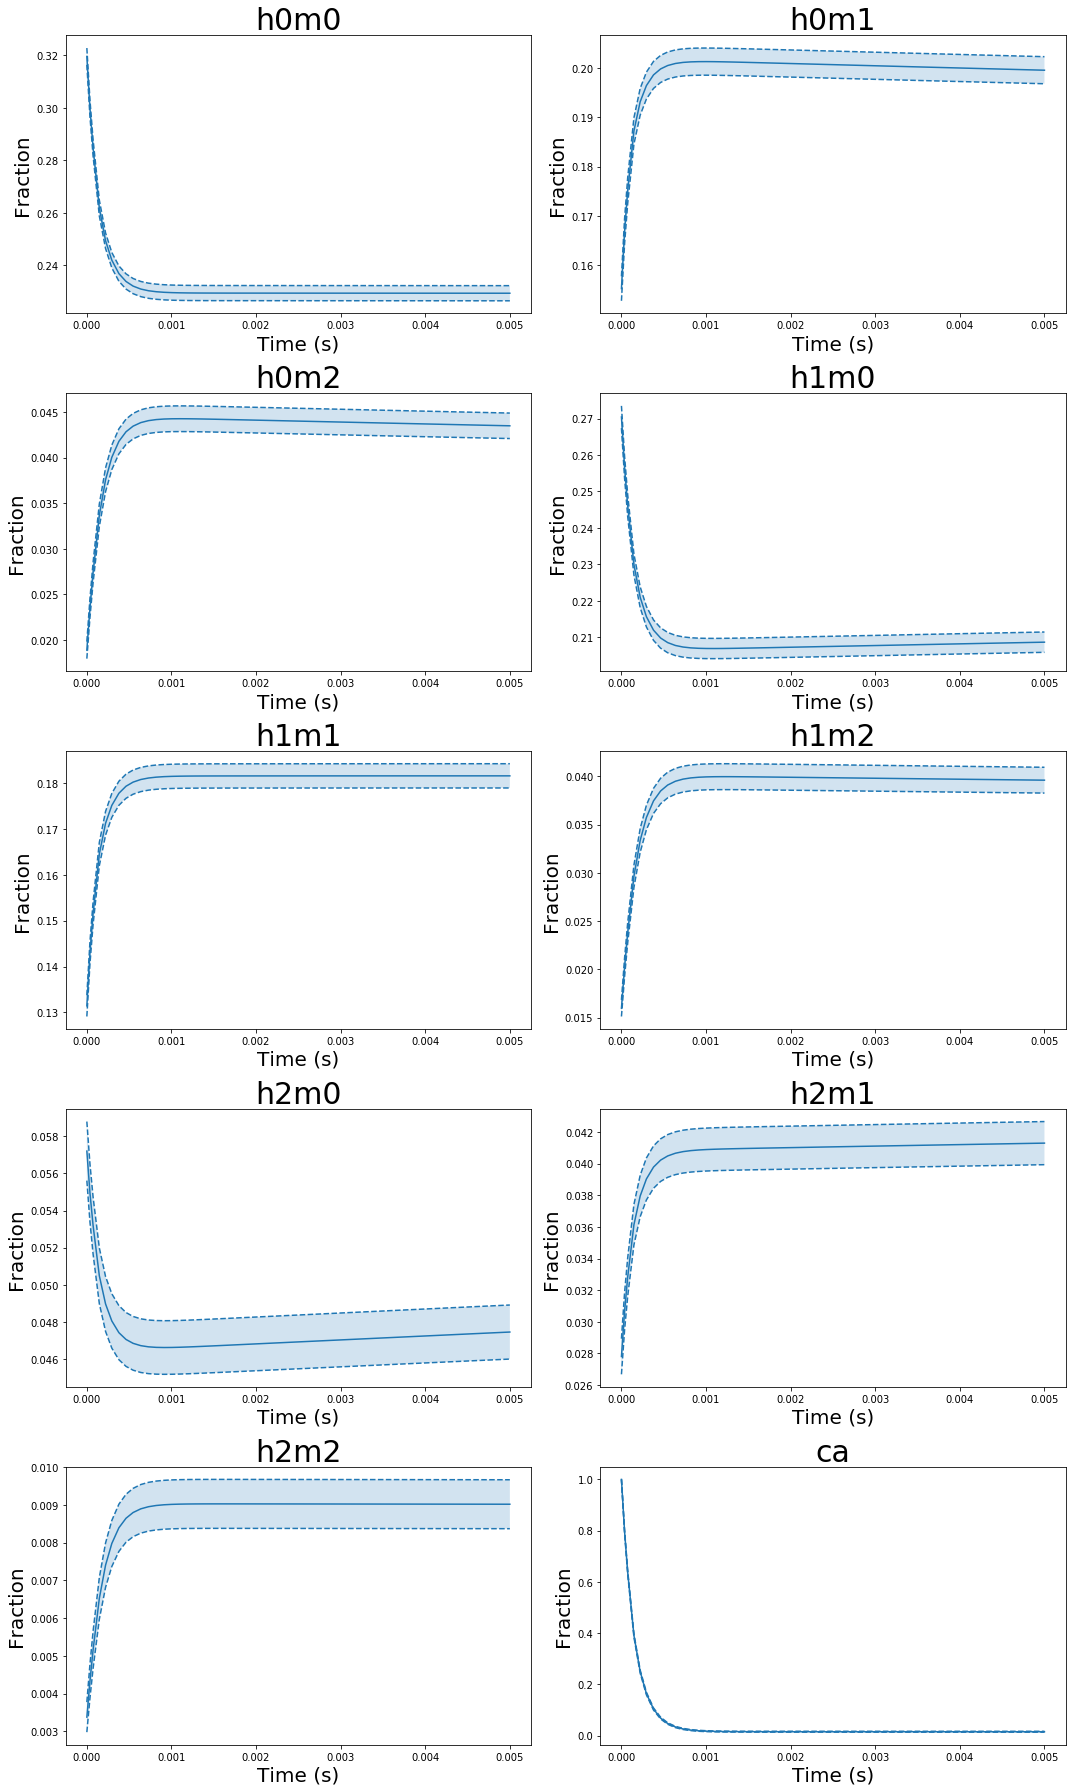

In [6]:
'''Graphing'''

fig, ax = plt.subplots(5, 2, figsize = (15, 25))

CA_IDX = 9
# Normalize
calb_sol.y[CA_IDX,:] = calb_sol.y[CA_IDX,:] / (CONC_CA)
calb_sol.y[:CA_IDX,:] = calb_sol.y[:CA_IDX,:] / CONC_CALB

mol_states = ['h0m0', 'h0m1', 'h0m2', 'h1m0', 'h1m1', 'h1m2', 'h2m0', 'h2m1', 'h2m2', 'ca']

for a, i in zip(ax.flatten(), range(len(y0))):
    # Std Dev norm factor
    if (i == CA_IDX):
        N = N_CA_BASE + N_CA_AP
    else:
        N = N_CALB
        
    # Std dev  
    sd = np.sqrt(np.multiply(calb_sol.y[i,:], (1 - calb_sol.y[i,:]))/N)
    a.plot(calb_sol.t, np.add(calb_sol.y[i,:], sd), 'C0--')
    a.plot(calb_sol.t, np.subtract(calb_sol.y[i,:], sd), 'C0--')
    
    # Cloud 
    a.fill_between(calb_sol.t, np.add(calb_sol.y[i,:], sd), np.subtract(calb_sol.y[i,:], sd), alpha=0.2)
    
    # Mean 
    a.plot(calb_sol.t, calb_sol.y[i,:])
    a.set_title(mol_states[i], size=30)
    a.set_xlabel('Time (s)', size=20)
    a.set_ylabel('Fraction', size=20)
    
    # Standard error of mean
    #sem = stats.sem(calb_sol.y[i,:])
    #a.plot(calb_sol.t, np.add(calb_sol.y[i,:], sem), 'C1')
    #a.plot(calb_sol.t, np.subtract(calb_sol.y[i,:], sem), 'C1')
 
plt.tight_layout()
plt.show()

### K_eff for Calbindin Binding

In [20]:
def k_eff(calb_sol):
    # k_values meaning
    TWO_BIND_SITES = 2 # factor for two open binding sites
    K_MED_FOR = 8.7e7    # medium affinity forward binding
    K_MED_REV = 35.8     # medium affinity reverse binding
    K_HIGH_FOR = 1.1e7    # high affinity forward binding
    K_HIGH_REV = 2.6      # high affinity reverse binding
    
    # k_m0m1, k_m1m2, k_m1m0, k_m2m1, k_h0h1, k_h1h2, k_h1h0, k_h2h1
    CALB_K_VALS = [TWO_BIND_SITES*K_MED_FOR, 
                   K_MED_FOR, 
                   K_MED_REV, 
                   TWO_BIND_SITES*K_MED_REV,
                   TWO_BIND_SITES*K_HIGH_FOR,
                   K_HIGH_FOR, 
                   K_HIGH_REV, 
                   TWO_BIND_SITES*K_HIGH_REV]
    
    k_m0m1, k_m1m2, k_m1m0, k_m2m1, k_h0h1, k_h1h2, k_h1h0, k_h2h1 = CALB_K_VALS
    
    K_BIND_STATE = np.array([k_m0m1 + k_h0h1,
                    k_m1m2 + k_h0h1,
                    k_h0h1,
                    k_m0m1 + k_h1h2,
                    k_m1m2 + k_h1h2,
                    k_h1h2,
                    k_m0m1, 
                    k_m1m2,
                    0])
    
    
    k_calb_bind = np.sum(calb_sol.y[:9,:].T*K_BIND_STATE, axis=1)
    
    return k_calb_bind

In [ ]:
def 

### Phi

In [124]:
from scipy.integrate import odeint
def dphi_dt(t, y, k_calb):
    return -k_calb*y

In [125]:
T_START = 0
T_STOP = 0.005
t = np.linspace(T_START, T_STOP, 10)
phi0 = 1

phi_sol = odeint(dphi_dt,phi0, t, args=(10000,))

<function matplotlib.pyplot.show(*args, **kw)>

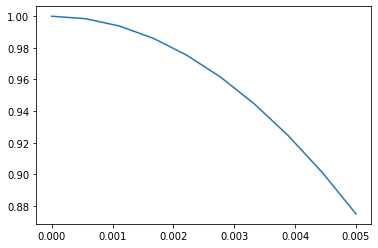

In [126]:
plt.plot(t, phi_sol)
plt.show

In [77]:
phi_sol.t

array([0.        , 0.00015792, 0.00031583, 0.005     ])

In [79]:
phi_sol.y[0,:]

array([1.        , 0.99842332, 0.99684913, 0.95122366])

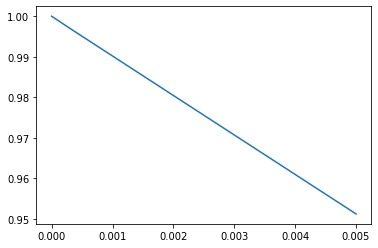

In [81]:
plt.plot([0.        , 0.00015792, 0.00031583, 0.005     ], [1.        , 0.99842332, 0.99684913, 0.95122366])

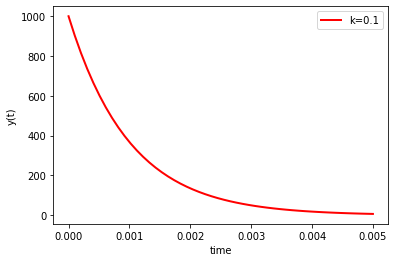

In [133]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dphi/dt
def phi(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 1000

# time points
t = np.linspace(0,0.005)

# solve ODEs
k = 1000
y = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y,'r-',linewidth=2,label='k=0.1')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()